# Indian Software Industry Salary Analysis
## Introduction
This project analyzes salary trends in the Indian software industry using a publicly available dataset. The goal is to understand how salaries vary across job roles, locations, and company ratings.


In [13]:
import pandas as pd

df = pd.read_csv("Software_Professional_Salaries.csv")  # replace with exact file name
df.head()


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


## Dataset Description
The dataset contains information about company ratings, job titles, salaries, number of salary reports, and locations within the Indian software industry.


In [17]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22773 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['rating', 'company_name', 'job_title', 'salary', 'salaries_reported',
       'location'],
      dtype='object')

In [19]:
df.isnull().sum()

,0
rating,0
company_name,1
job_title,0
salary,0
salaries_reported,0
location,0


## Data Cleaning
This section includes column name standardization, handling missing values, and ensuring salary data is in numeric format for analysis.


In [20]:
df = df.dropna(subset=['company_name'])

In [22]:
df['salary'].dtype
df['salary'].head(10)

,salary
0,400000
1,400000
2,1000000
3,300000
4,600000
5,100000
6,192000
7,400000
8,300000
9,600000


In [24]:
df['salary'].min(), df['salary'].max(), df['salary'].mean()

(2112, 90000000, np.float64(695338.9891538225))

## Exploratory Data Analysis
In this section, salary distributions, role-wise and location-wise salary trends are analyzed using statistical methods and visualizations.


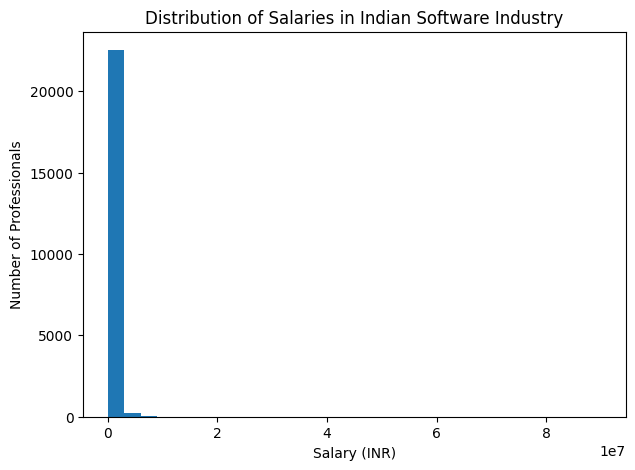

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df['salary'], bins=30)
plt.xlabel("Salary (INR)")
plt.ylabel("Number of Professionals")
plt.title("Distribution of Salaries in Indian Software Industry")
plt.show()

In [29]:
top_roles = (
    df.groupby('job_title')['salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
pd.options.display.float_format = '{:,.0f}'.format
top_roles

,salary
job_title,
"Lead UI Designer, Magento Front-end Developer","9,900,000"
Non Software Development Engineer,"9,800,000"
Mobile App Development,"5,000,000"
Front-end - Intern,"4,900,000"
Principal Mobile Architect,"4,800,000"
Front-End Architect,"4,700,000"
Staff Software Development Engineer,"4,466,667"
Senior Manager Software Development Engineering,"4,233,333"
SMTS Software Development Engineer,"4,200,000"


In [30]:
median_roles = (
    df.groupby('job_title')['salary']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

median_roles

,salary
job_title,
"Lead UI Designer, Magento Front-end Developer","9,900,000"
Non Software Development Engineer,"9,800,000"
Mobile App Development,"5,000,000"
Front-end - Intern,"4,900,000"
Principal Mobile Architect,"4,800,000"
Front-End Architect,"4,700,000"
SMTS Software Development Engineer,"4,200,000"
Database Administrator (Database Administrator) - Contractor,"4,100,000"
"Manager, Database Administration","4,000,000"


In [32]:
df_clean = df[~df['job_title'].str.contains('intern', case=False)]
df_clean.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10)


,salary
job_title,
"Lead UI Designer, Magento Front-end Developer","9,900,000"
Non Software Development Engineer,"9,800,000"
Mobile App Development,"5,000,000"
Principal Mobile Architect,"4,800,000"
Front-End Architect,"4,700,000"
Staff Software Development Engineer,"4,466,667"
Senior Manager Software Development Engineering,"4,233,333"
SMTS Software Development Engineer,"4,200,000"
Database Administrator (Database Administrator) - Contractor,"4,100,000"


In [33]:
df.groupby('location')['salary'].median().sort_values(ascending=False).head(10)

,salary
location,
Mumbai,"708,000"
Bangalore,"500,000"
Kolkata,"500,000"
Hyderabad,"500,000"
Kerala,"500,000"
Jaipur,"500,000"
New Delhi,"500,000"
Madhya Pradesh,"500,000"
Pune,"500,000"


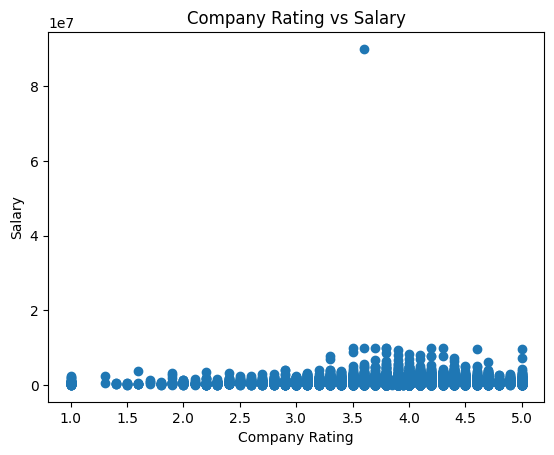

In [35]:
df[['rating', 'salary']].corr()
import matplotlib.pyplot as plt

plt.scatter(df['rating'], df['salary'])
plt.xlabel("Company Rating")
plt.ylabel("Salary")
plt.title("Company Rating vs Salary")
plt.show()

## Insights & Conclusion
- Salary data is right-skewed due to high-paying senior roles.
- Median salary provides a more realistic estimate than mean.
- Senior and architect-level roles earn significantly higher salaries.
- Metro cities dominate higher salary brackets.
- Company rating shows weak correlation with salary.
